## Read images

In [92]:
'''
Glacier Images collection
'''
import os
folder_path = 'https://raw.githubusercontent.com/vickybwu/Myfiles/main/glacier%20images/'
glacier_images = {
    'careser': ['careser19330899.png', 'careser2012082801.png'],
    'ciardoney': ['ciardoney19860905.png', 'ciardoney20140922.png'],
    'djankuat': ['djankuat19920822.png', 'djankuat20010899.png'],
    'ossoue': ['ossoue19119999.png', 'ossoue20119999.png'],
    'pedersen': ['pedersen1920000001.png', 'pedersen2005080301.png'],
    'tuyuksuyskiy':['tuyuksuyskiy19700899.png', 'tuyuksuyskiy20060899.png']
}
selected_pair = 'ciardoney'
then_image_path = glacier_images[selected_pair][0]
now_image_path = glacier_images[selected_pair][1]
then_file_path = os.path.join(folder_path, then_image_path)
now_file_path = os.path.join(folder_path, now_image_path)

<ipython-input-93-d59f0b51dad3>:7: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  imgl = mpimg.imread(now_file_path)
<ipython-input-93-d59f0b51dad3>:8: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  imgr = mpimg.imread(then_file_path)


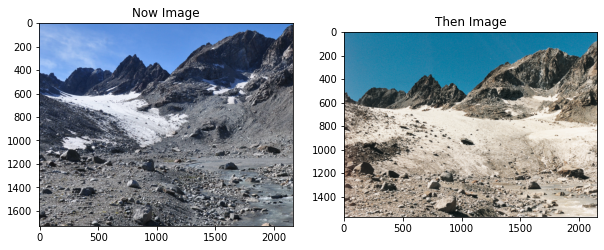

In [93]:
# Read Images 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np
import cv2

imgl = mpimg.imread(now_file_path) 
imgr = mpimg.imread(then_file_path)
imgl *= 255 # or any coefficient
imgl = imgl.astype(np.uint8)
imgr *= 255 # or any coefficient
imgr = imgr.astype(np.uint8)
# imgl = cv2.normalize(imgl, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
# imgr = cv2.normalize(imgr, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)


# Show images
fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(imgl)
ax[0].title.set_text('Now Image')
ax[1].imshow(imgr, cmap = plt.get_cmap(name = 'gray'))
ax[1].title.set_text('Then Image') 

plt.show()

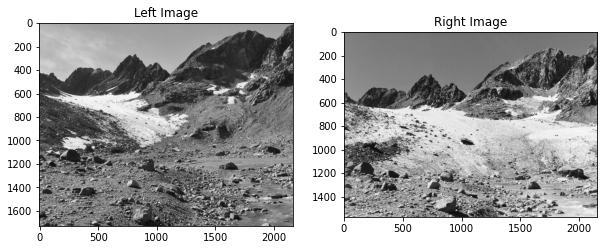

In [4]:
# Convert left image to greyscale
import cv2
imgl_gray = cv2.cvtColor(imgl,cv2.COLOR_BGR2GRAY)
imgr_gray = cv2.cvtColor(imgr,cv2.COLOR_BGR2GRAY)

# Show images
fig2, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(imgl_gray, cmap = plt.get_cmap(name = 'gray'))
ax[0].title.set_text('Left Image')
ax[1].imshow(imgr_gray, cmap = plt.get_cmap(name = 'gray'))
ax[1].title.set_text('Right Image') 


## Manually select 4 pairs of points from both images

In [141]:
import matplotlib
matplotlib.use('TkAgg')

In [145]:
import numpy as np
import Tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt

left_points = np.zeros((8,3))
right_points = np.zeros((8,3))

root = tk.Tk()

fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(imgr)
ax[0].title.set_text('Then Image')
ax[1].imshow(imgl)
ax[1].title.set_text('Now Image') 

for i in range(8):
    point_left = plt.ginput(1, show_clicks = True)
    left_points[i]= np.array([point_left[0][0], point_left[0][1], 1])
    ax[0].plot(left_points[i,0], left_points[i, 1], 'o')
    point_right = plt.ginput(1, show_clicks = True)
    right_points[i]= np.array([point_right[0][0], point_right[0][1], 1])
    ax[1].plot(right_points[i,0], right_points[i, 1], 'x')

canvas = FigureCanvasTkAgg(fig, master=root)
plot_widget = canvas.get_tk_widget()

# def update():
#     s = np.cos(np.pi*t)
#     plt.plot(t,s)
#     fig.canvas.draw_idle()

# plot_widget.grid(row=0, column=0)
# tk.Button(root,text="Update",command=update).grid(row=1, column=0)
root.mainloop()

ModuleNotFoundError: No module named 'Tkinter'

IndexError: list index out of range

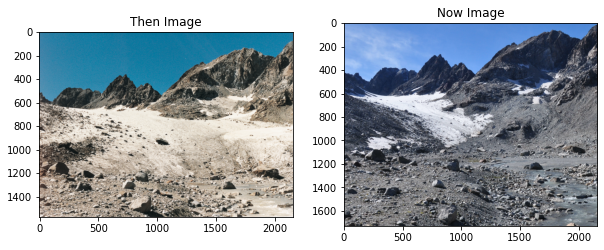

In [144]:
# Create arrays for points in left and right images
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

number_of_pairs = 8
left_points = np.zeros((8,3))
right_points = np.zeros((8,3))

rows, cols, di = imgl.shape
fig, ax = plt.subplots(1,2, figsize = (10,10))

ax[0].imshow(imgr, cmap = plt.get_cmap(name = 'gray'))
ax[0].title.set_text('Then Image')
ax[1].imshow(imgl, cmap = plt.get_cmap(name = 'gray'))
ax[1].title.set_text('Now Image') 

# Select points on the left image 
for i in range(number_of_pairs):
    point_left = plt.ginput(1, show_clicks = True)
    left_points[i]= np.array([point_left[0][0], point_left[0][1], 1])
    point_right = plt.ginput(1, show_clicks = True)
    right_points[i]= np.array([point_right[0][0], point_right[0][1], 1])
    ax[0].plot(left_points[i,0], left_points[i, 1], 'o')
    ax[1].plot(right_points[i,0], right_points[i, 1], '*')
    
print('8 points on the Then image are:')
print(left_points)
print('8 corresponding points on the Now image are:')
print(right_points)

with open('left_points_t.npy', 'wb') as f:  
    np.save(f, left_points)

with open('right_points_t.npy', 'wb') as f:  
    np.save(f, right_points)
    


### Load the pre-selected corresponding points

In [132]:
with open('left_points.npy', 'rb') as f:
    left_points = np.load(f)
    
with open('right_points.npy', 'rb') as f:
    right_points = np.load(f)

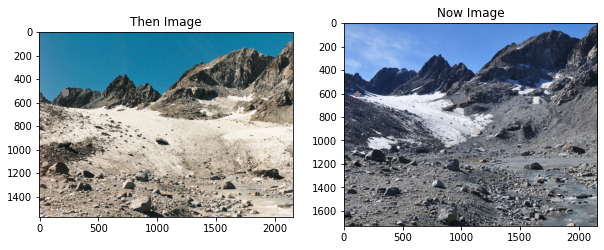

In [134]:
%matplotlib inline
rows, cols, di = imgl.shape

fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(imgr)
ax[0].title.set_text('Then Image')
ax[1].imshow(imgl)
ax[1].title.set_text('Now Image') 


for pt in range(8):
    ax[0].plot(left_points[i,0], left_points[i, 1], 'o')
    ax[1].plot(right_points[i,0], right_points[i, 1], '*')


### T_Matrix

In [7]:
# Create translation matrix T
left_x_mean = np.mean(left_points[:,0])
#print(left_x_mean)
left_y_mean = np.mean(left_points[:,1])
right_x_mean = np.mean(right_points[:,0])
right_y_mean = np.mean(right_points[:,1])
#scale_factor_left = np.sqrt(left_x_mean**2 + left_y_mean**2)/np.sqrt(2)
#print(scale_factor_left)
scale_factor_left = np.sqrt(2)/np.sqrt(left_x_mean**2 + left_y_mean**2)
scale_factor_right = np.sqrt(2)/np.sqrt(right_x_mean**2 + right_y_mean**2)

T_left = scale_factor_left * np.array([[1, 0, -left_x_mean],
                                      [0, 1, -left_y_mean],
                                      [0, 0, 1/scale_factor_left]])

T_right = scale_factor_right * np.array([[1, 0, -right_x_mean],
                  [0, 1, -right_y_mean],
                  [0, 0, 1/scale_factor_right]])

print("Left T Matrix:",'\n', T_left, '\n', "Right T Matrix:", '\n', T_right)

Left T Matrix: 
 [[ 0.00127724  0.         -1.10032647]
 [ 0.          0.00127724 -0.88841525]
 [ 0.          0.          1.        ]] 
 Right T Matrix: 
 [[ 0.00131737  0.         -1.04509652]
 [ 0.          0.00131737 -0.95277136]
 [ 0.          0.          1.        ]]


### Normalize test points

In [8]:
normalized_left_points = np.zeros((left_points.shape))
normalized_right_points = np.zeros((right_points.shape))

for i in range(8):
    normalized_left_points[i] = T_left.dot(left_points[i])

for i in range(8):
    normalized_right_points[i] = T_right.dot(right_points[i])

print(normalized_left_points, '\n', normalized_right_points)

[[-0.82878583 -0.23407416  1.        ]
 [-0.29531449 -0.33205869  1.        ]
 [-0.04490958 -0.52802776  1.        ]
 [ 1.18534066 -0.80020701  1.        ]
 [-0.08845826  0.84375569  1.        ]
 [-0.77434998  0.50625342  1.        ]
 [ 0.8042897  -0.6586738   1.        ]
 [ 0.04218778  1.20303231  1.        ]] 
 [[-0.89305306 -0.15537444  1.        ]
 [-0.34434334 -0.25615785  1.        ]
 [-0.06438941 -0.44652653  1.        ]
 [ 1.24579502 -0.76007494  1.        ]
 [-0.04199309  0.71808185  1.        ]
 [-0.83706227  0.51651501  1.        ]
 [ 0.82026504 -0.59210258  1.        ]
 [ 0.11478111  0.97563947  1.        ]]


### A matrix

In [9]:
# Create foundamental matrix
def A_matrix(pl, pr):
    A = np.zeros((8,9))
    A[:, 0] = np.array([pl[i][0]*pr[i][0] for i in range(8)])
    A[:, 1] = np.array([pl[i][0]*pr[i][1] for i in range(8)])
    A[:, 2] = np.array([pl[i][0] for i in range(8)])
    A[:, 3] = np.array([pl[i][1]*pr[i][0] for i in range(8)])
    A[:, 4] = np.array([pl[i][1]*pr[i][1] for i in range(8)])
    A[:, 5] = np.array([pl[i][1] for i in range(8)])
    A[:, 6] = np.array([pr[i][0] for i in range(8)])
    A[:, 7] = np.array([pr[i][1] for i in range(8)])
    A[:, 8] = np.array([1 for i in range(8)])
    return A

A = A_matrix(normalized_left_points, normalized_right_points)
print('A matrix:')
print(A)

A matrix:
[[ 0.74014973  0.12877213 -0.82878583  0.20904065  0.03636914 -0.23407416
  -0.89305306 -0.15537444  1.        ]
 [ 0.10168958  0.07564713 -0.29531449  0.1143422   0.08505944 -0.33205869
  -0.34434334 -0.25615785  1.        ]
 [ 0.0028917   0.02005332 -0.04490958  0.03399939  0.2357784  -0.52802776
  -0.06438941 -0.44652653  1.        ]
 [ 1.47669149 -0.90094773  1.18534066 -0.99689391  0.6082173  -0.80020701
   1.24579502 -0.76007494  1.        ]
 [ 0.00371464 -0.06352027 -0.08845826 -0.03543191  0.60588565  0.84375569
  -0.04199309  0.71808185  1.        ]
 [ 0.64817916 -0.39996339 -0.77434998 -0.42376564  0.26148749  0.50625342
  -0.83706227  0.51651501  1.        ]
 [ 0.65973072 -0.47622201  0.8042897  -0.54028709  0.39000245 -0.6586738
   0.82026504 -0.59210258  1.        ]
 [ 0.00484236  0.04116007  0.04218778  0.13808539  1.17372581  1.20303231
   0.11478111  0.97563947  1.        ]]


### F_matrix

In [10]:
## Find SVD of A.T*A
from numpy import linalg
import math
U, lambdas, V = linalg.svd(A)
F_matrix = V[-1]
F_matrix = np.array([F_matrix]).T
F_matrix = np.reshape(F_matrix, (3,3))
#print(F_matrix)

# Enforce singularity constraint on F
U_f, D_f, V_f = linalg.svd(F_matrix)
D_f[2] = 0
F_matrix = (U_f.dot(np.diag(D_f))).dot(V_f)
print(F_matrix)

[[-0.0099668  -0.41353999 -0.27476401]
 [ 0.36350857  0.00785182 -0.48675899]
 [ 0.29091249  0.54723813 -0.01247359]]


In [11]:
# Denormalize F matrix
F_matrix = (T_right.T.dot(F_matrix)).dot(T_left)
F_matrix

array([[-1.67701072e-08, -6.95821259e-07,  1.36477333e-04],
       [ 6.11638518e-07,  1.32114560e-08, -1.17735463e-03],
       [-5.74906390e-05,  1.24140398e-03, -7.55129454e-02]])

### Left and Right Epipoles

In [12]:
# Find epipole lines - svd of F
U_f, D_f, V_f = linalg.svd(F_matrix)
print('U:', '\n', U_f, '\n', 'V:', '\n', V_f, '\n', 'D:', '\n', np.diag(D_f))

# Get the left epipole 
el = V_f[2,:]
el = [el[0]/el[2], el[1]/el[2]]
print('left epipole:', el)

# Get the right epipole
er = U_f[:, 2]
er = [er[0]/er[2], er[1]/er[2]]
print('left epipole:', er)

U: 
 [[ 1.80677647e-03  7.97497426e-02 -9.96813279e-01]
 [-1.55852852e-02 -9.96691589e-01 -7.97682560e-02]
 [-9.99876910e-01  1.56797427e-02 -5.57876427e-04]] 
 V: 
 [[ 7.60917803e-04 -1.64333653e-02  9.99864674e-01]
 [-7.77269513e-02  9.96839082e-01  1.64427897e-02]
 [-9.96974394e-01 -7.77289444e-02 -5.18802777e-04]] 
 D: 
 [[7.55324680e-02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.94577400e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.21871712e-20]]
left epipole: [1921.682839171555, 149.82368599411433]
left epipole: [1786.7994251340892, 142.9855288691988]


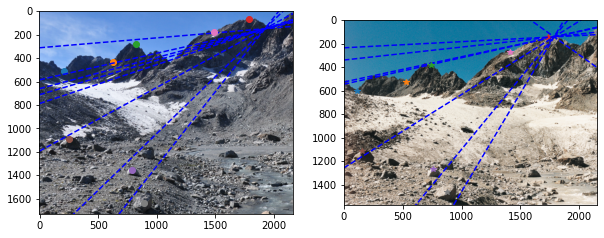

In [13]:
rows, cols, di = imgl.shape

fig, ax = plt.subplots(1,2, figsize = (10,10))

for i in range(8):
    an_1 = F_matrix.dot(left_points[i])
    an_2 = right_points[i].dot(F_matrix)

    x = np.arange(cols+1)
    y_1 = -(an_1[0]*x+an_1[2])/an_1[1]
    y_2 = -(an_2[0]*x+an_2[2])/an_2[1]

    ax[0].plot(left_points[i,0], left_points[i, 1], 'o')
    ax[1].plot(right_points[i,0], right_points[i, 1], '*')
    
    ax[0].plot(x, y_2, 'b--')
    ax[1].plot(x, y_1, 'b--')


ax[0].imshow(imgl)
ax[1].imshow(imgr)

## Feature based matching

### Extract corner features

In [13]:
import cv2 as cv
import matplotlib.patches as patches

def extract_features(target_img):

    target_img_copy = target_img[:,:,:3].copy()

    gray = cv.cvtColor(target_img_copy,cv.COLOR_BGR2GRAY)
    
    dst = cv.cornerHarris(gray,2,3,0.04)
    
    #result is dilated for marking the corners, not important
    dst = cv.dilate(dst,None)
    ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
    dst = np.uint8(dst)
    
    # Threshold for an optimal value, it may vary depending on the image.
    target_img_copy[dst>0.001*dst.max()]=[0,0,255]
    
    # find centroids
    ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
    
    # define the criteria to stop and refine the corners
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
    corners = np.int64(cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria))
    
    return corners


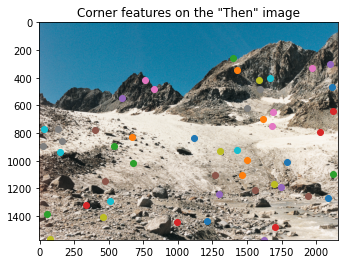

In [97]:
#corner features of the left image in color
features = extract_features(imgr)
sample = features[np.random.choice(len(features), 50)]

#show corner features on the left image
plt.imshow(imgr)
plt.title('Corner features on the "Then" image')
for point in sample:
    plt.plot(point[0], point[1], 'o')

### Edge detection - extract edges 

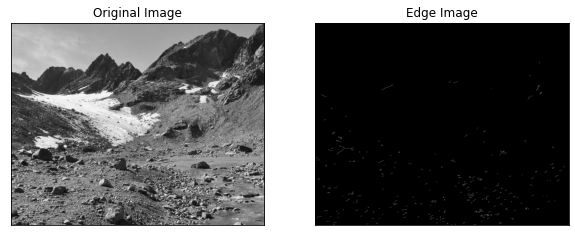

In [15]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt


fig, ax = plt.subplots(1,2, figsize = (10,10))
edges = cv2.Canny(imgl_gray,400,800)
plt.subplot(121),plt.imshow(imgl_gray,cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges, cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Define similarity measurement

In [16]:
def similarity(window1, window2):
    ssd = (-(window1 - window2)**2).sum()

    return ssd

### search for correspondence corner points on the right image using similarity score

In [17]:
def search_correspondence(source_pt, source_img, target_img, F_mat, window_size):
    #Calculate Epipolar Line in Target Image
    homogeneous_pt = np.r_[source_pt, np.ones(1)]

    an = F_mat @ homogeneous_pt
    line_x = np.arange(0, target_img.shape[1])
    line_y = np.int64(-(an[0]*line_x + an[2]) / an[1])
    
    plt.plot(line_x, line_y)
    #Measure similarity between windows
    hw = int((window_size - 1)/2)
    
    #Pad Images with borders
    padded_source_img = cv.copyMakeBorder(source_img[:,:], hw, hw, hw, hw, cv.BORDER_CONSTANT,value=0)
    padded_target_img = cv.copyMakeBorder(target_img[:,:], hw, hw, hw, hw, cv.BORDER_CONSTANT,value=0)
    
    spt_padded = np.array([source_pt[1], source_pt[0]]) + hw

    #Target Window
    window1 = padded_source_img[spt_padded[0]-hw:spt_padded[0]+hw+1, spt_padded[1]-hw:spt_padded[1]+hw+1]
    
    coordinates = np.array(list(zip(line_x, line_y)))
    score_list = []
    
    #Sliding windows to search for the corresponding point
    for target_pt in coordinates:
        tpt_padded = np.array(np.array([target_pt[1], target_pt[0]])) + hw
        
        if tpt_padded[0] <= hw or tpt_padded[0] >= target_img.shape[0] + hw:
            continue            
        elif tpt_padded[1] <= hw or tpt_padded[1] >= target_img.shape[1] + hw:
            continue

        window2 = padded_target_img[tpt_padded[0]-hw:tpt_padded[0]+hw+1, tpt_padded[1]-hw:tpt_padded[1]+hw+1]

        similarity_score = similarity(window1, window2)

        score_list.append(similarity_score)
        
    #Returns argmax coordinate if the similarity scores are available
    if len(score_list) > 0:
        c_pt = coordinates[np.argmax(score_list)]
    else:
        c_pt = np.array([-1,-1])
        
    return c_pt

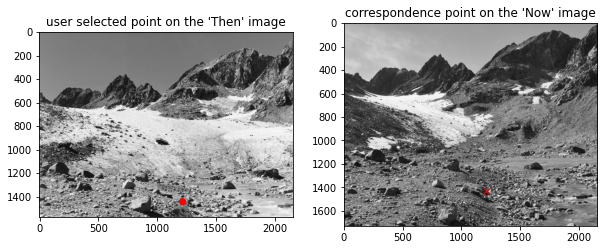

In [99]:
# Create figure and axes
fig, ax = plt.subplots(1,2, figsize = (10,20))

# Display the image
ax[0].imshow(imgr_gray, cmap = 'gray')
ax[0].set_title("user selected point on the 'Then' image")
ax[1].imshow(imgl_gray, cmap = 'gray')
ax[1].set_title("correspondence point on the 'Now' image")

ax[0].plot(source_pt[0], source_pt[1], 'ro')
ax[1].plot(source_pt[0], source_pt[1], 'rx')

RGBA values at corner point in the "Now" image is: 
 (0.196571, 0.711827, 0.479221, 1.0)
RGBA values at corner point in the "Then" image is: 
 (0.136408, 0.541173, 0.554483, 1.0)


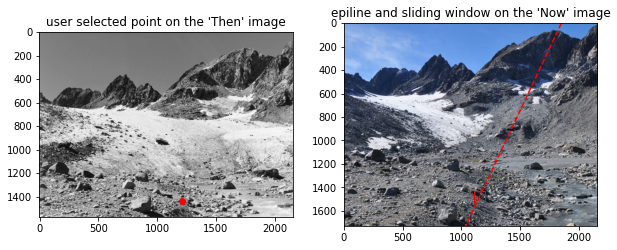

In [98]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image


# Create figure and axes
fig, ax = plt.subplots(1,2, figsize = (10,20))

# Display the image
ax[0].imshow(imgr_gray, cmap = 'gray')
ax[0].set_title("user selected point on the 'Then' image")
ax[1].imshow(imgl_gray, cmap = 'gray')
ax[1].set_title("epiline and sliding window on the 'Now' image")

# plot a point on left image
source_pt = np.r_[sample[10], np.ones(1)]
ax[0].plot(source_pt[0], source_pt[1], 'ro')

# plot the epipole line on right image

an = F_matrix @ source_pt
line_x = np.arange(0, imgr.shape[1])
line_y = np.int64(-(an[0]*line_x + an[2]) / an[1])
ax[1].plot(line_x, line_y, 'r--')


# plot a window along epipole line

# Create a Rectangle patch

rect = patches.Rectangle((line_x[-1000]-100/2, line_y[-1000]-100/2), 100, 100, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax[1].add_patch(rect)
i1 = plt.imshow(imgr)
i2 = plt.imshow(imgl)
print('RGBA values at corner point in the "Now" image is:','\n', i1.cmap(i1.norm(imgl_gray [int(source_pt[0]), int(source_pt[1])] )))
print('RGBA values at corner point in the "Then" image is:','\n', i2.cmap(i2.norm(imgr_gray [int(source_pt[0]), int(source_pt[1])] )))
plt.show()

In [120]:
right_points[1]

array([531.93154122, 528.78917563,   1.        ])

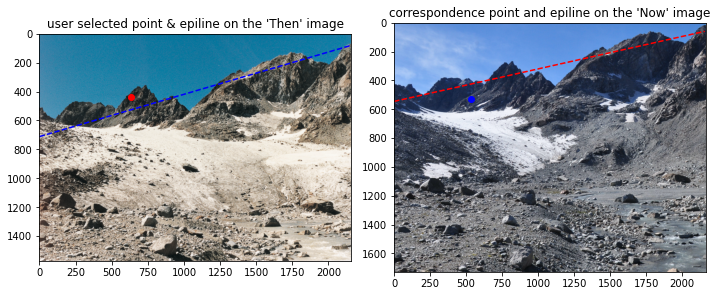

In [119]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Create figure and axes
fig, ax = plt.subplots(1,2, figsize = (10,20))

# Display the image
ax[0].imshow(imgr)
ax[0].set_title("user selected point & epiline on the 'Then' image")
ax[0].set_xlim(left = 0, right = imgr.shape[1])
ax[0].set_ylim(top = 0, bottom = imgr.shape[0])
ax[1].imshow(imgl)
ax[1].set_title("correspondence point and epiline on the 'Now' image")
ax[1].set_xlim(left = 0, right = imgl.shape[1])
ax[1].set_ylim(top = 0, bottom = imgl.shape[0])

# plot a point on left image
source_pt = left_points[1]
correspondence_pt = right_points[1]
ax[0].plot(source_pt[0], source_pt[1], 'bo')
ax[1].plot(correspondence_pt[0], correspondence_pt[1], 'ro')

# plot the epipole line on right image

an = F_matrix @ source_pt
line_x = np.arange(0, imgr.shape[1])
line_y = np.int64(-(an[0]*line_x + an[2]) / an[1])
ax[1].plot(line_x, line_y, 'r--')

# plot the epipole line on left image

an_l = correspondence_pt.dot(F_matrix)
line_x_l = np.arange(0, imgl.shape[1])
line_y_l = np.int64(-(an_l[0]*line_x_l + an_l[2]) / an_l[1])
ax[0].plot(line_x_l, line_y_l, 'b--')


# plot a window along epipole line

# Create a Rectangle patch

#rect = patches.Rectangle((line_x[-1000]-100/2, line_y[-1000]-100/2), 100, 100, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
#ax[1].add_patch(rect)
# i1 = plt.imshow(imgr)
# i2 = plt.imshow(imgl)
#print('RGBA values at corner point in the "Now" image is:','\n', i1.cmap(i1.norm(imgl_gray [int(source_pt[0]), int(source_pt[1])] )))
#print('RGBA values at corner point in the "Then" image is:','\n', i2.cmap(i2.norm(imgr_gray [int(source_pt[0]), int(source_pt[1])] )))
plt.tight_layout()
plt.show()

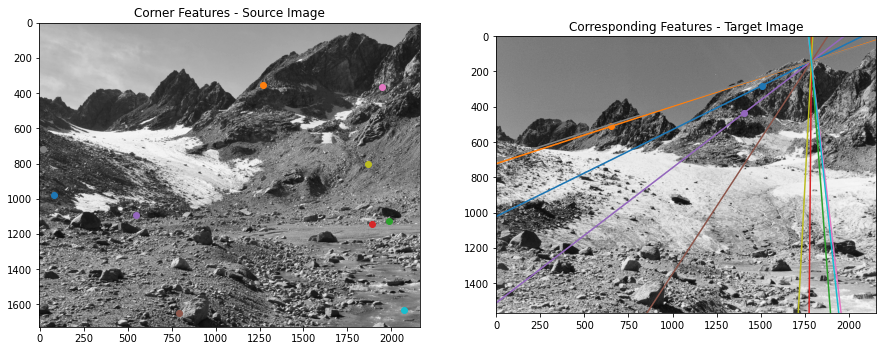

In [38]:
corners = extract_features(imgl)
#Pick 50 corners randomly
n_sample = 10
corners_sample = corners[np.random.choice(len(corners), n_sample)]

imgl_gray = cv2.cvtColor(imgl,cv.COLOR_BGR2GRAY)
imgr_gray = cv2.cvtColor(imgr,cv.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(15, 15))

fig.add_subplot(121)
for c in corners_sample:
    plt.scatter(c[0], c[1])

plt.imshow(imgl_gray, cmap = plt.get_cmap(name = 'gray'))
plt.title("Corner Features - Source Image")

fig.add_subplot(122)

for c in corners_sample:
    correspondence = search_correspondence(c, imgl_gray, imgr_gray, F_matrix, 20)
    plt.scatter(correspondence[0], correspondence[1])

plt.imshow(imgr_gray, cmap = plt.get_cmap(name = 'gray'))
plt.title("Corresponding Features - Target Image");


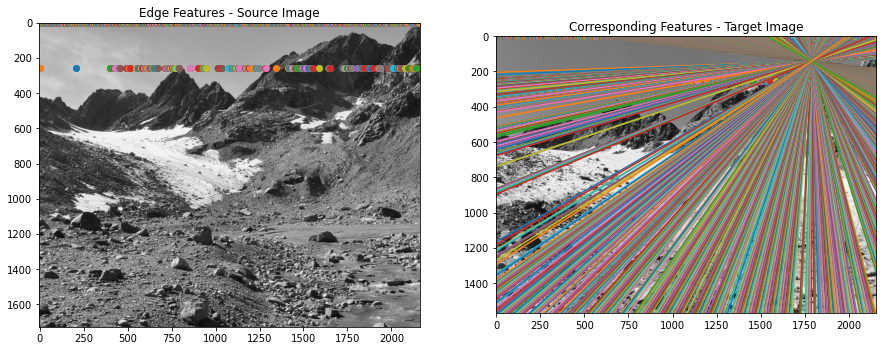

In [107]:
edges = cv.Canny(imgl,150,450)

# filter for non-zero rows


n_sample = 1
edges_sample = edges[np.random.choice(len(edges), n_sample)]
flattened_edge = edges_sample.flatten()
edge_points = np.array([(i, flattened_edge[i]) for i in range(len(flattened_edge))])
edge_points = edge_points[~np.all(edge_points == 0, axis=1)]



fig = plt.figure(figsize=(15, 15))

fig.add_subplot(121)
for pt in edge_points:
    plt.scatter(pt[0], pt[1])

plt.imshow(imgl_gray, cmap = plt.get_cmap(name = 'gray'))
plt.title("Edge Features - Source Image")

fig.add_subplot(122)

for pt in edge_points:
    correspondence = search_correspondence(pt, imgl_gray, imgr_gray, F_matrix, 50)
    plt.scatter(pt[0], pt[1])


plt.imshow(imgr_gray, cmap = plt.get_cmap(name = 'gray'))
plt.title("Corresponding Features - Target Image");

### User Interface for correspondence matching

(0.19607843137254902, 0.19607843137254902, 0.19607843137254902, 1.0)

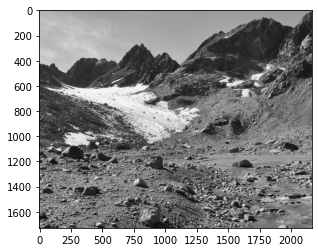

In [55]:
im = plt.imshow(imgl_gray,cmap='gray')
im.cmap(im.norm(imgl_gray[1078, 773]))
        

In [65]:
import matplotlib
matplotlib.use('TkAgg')

In [18]:
fig2,ax = plt.subplots(1,3, figsize=(10,10))

ax[0].imshow(imgl_gray, cmap = 'gray')
ax[0].set_title('tuyuksuyskiy1970 - select a point on the image')
ax[1].imshow(imgr_gray, cmap = 'gray')
ax[1].set_title('tuyuksuyskiy2006 - select a validation point on the image')
ax[2].imshow(imgr_gray, cmap = 'gray')
ax[2].set_title('tuyuksuyskiy2006 - system matching result')

number_of_points = 3
user_selected = np.zeros((number_of_points,2))
user_validation = np.zeros((number_of_points,2))
system_matched = np.zeros((number_of_points,2))

for i in range(number_of_points):
    select_pt = plt.ginput(1, show_clicks = True)
    user_selected[i] = np.array([select_pt[0][0], select_pt[0][1]])
    ax[0].plot(select_pt[0][0], select_pt[0][1], 'o')
    #print('selected point has intenseity of')
    
    validation_pt = plt.ginput(1, show_clicks = True)
    user_validation[i] = np.array([validation_pt[0][0], validation_pt[0][1]])
    ax[1].plot(validation_pt[0][0], validation_pt[0][1], 'o')

    matched_pt = search_correspondence(np.int64(user_selected[i]), imgl_gray, imgr_gray, F_matrix, 20)
    system_matched[i] = np.array([matched_pt[0], matched_pt[1]])
    ax[2].plot(select_pt[0][0], select_pt[0][1], 'x')
    #print('matched point by location has intensity of')
    ax[2].plot(matched_pt[0], matched_pt[1], 'o')
    #print('matched point by stereo system has intensity of')


TclError: 

## Intensity analysis 

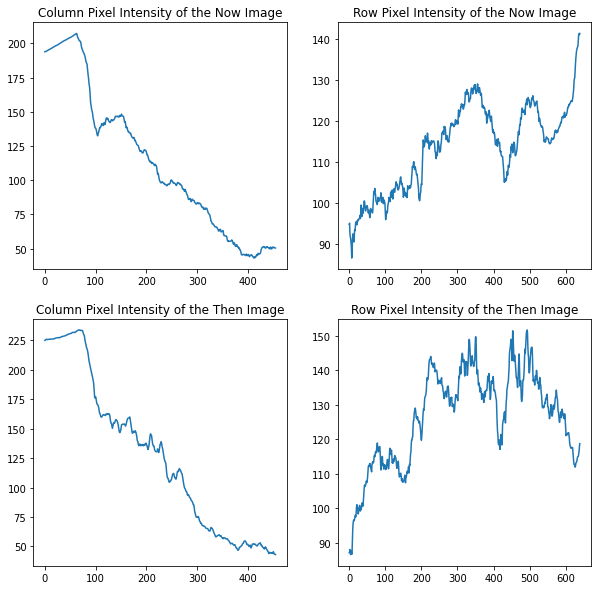

In [114]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
 
imgl_gray = cv.cvtColor(imgl,cv.COLOR_BGR2GRAY)
# convert to numpy array
n1 = imgl_gray
n2 = imgr

# average columns and rows
# left to right
rows_l, rows_r = [n1.mean(axis=0),n2.mean(axis=0)]
# bottom to top
cols_l, cols_r = [n1.mean(axis=1), n2.mean(axis=1)]

# plot histograms
f, ax = plt.subplots(2, 2, figsize = (10,10))
ax[0,0].plot(cols_l)
ax[0,1].plot(rows_l)
ax[0,0].set_title('Column Pixel Intensity of the Now Image')
ax[0,1].set_title('Row Pixel Intensity of the Now Image')
ax[1,0].plot(cols_r)
ax[1,1].plot(rows_r)
ax[1,0].set_title('Column Pixel Intensity of the Then Image')
ax[1,1].set_title('Row Pixel Intensity of the Then Image')
f.show()

## Segment snow area

<ipython-input-90-2df5553ca5fb>:7: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  imgl = mpimg.imread(now_file_path)
<ipython-input-90-2df5553ca5fb>:8: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  imgr = mpimg.imread(then_file_path)


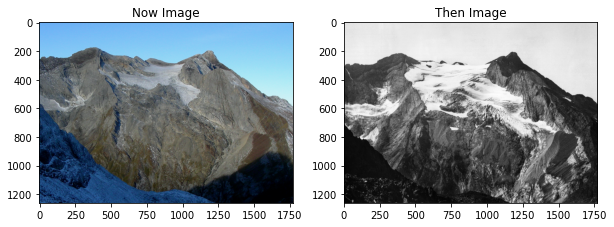

In [90]:
selected_pair = 'ossoue'
then_image_path = glacier_images[selected_pair][0]
now_image_path = glacier_images[selected_pair][1]
then_file_path = os.path.join(folder_path, then_image_path)
now_file_path = os.path.join(folder_path, now_image_path)

imgl = mpimg.imread(now_file_path) 
imgr = mpimg.imread(then_file_path)
imgl *= 255 # or any coefficient
imgl = imgl.astype(np.uint8)
imgr *= 255 # or any coefficient
imgr = imgr.astype(np.uint8)
# imgl = cv2.normalize(imgl, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
# imgr = cv2.normalize(imgr, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)


# Show images
fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(imgl)
ax[0].title.set_text('Now Image')
ax[1].imshow(imgr, cmap = plt.get_cmap(name = 'gray'))
ax[1].title.set_text('Then Image') 

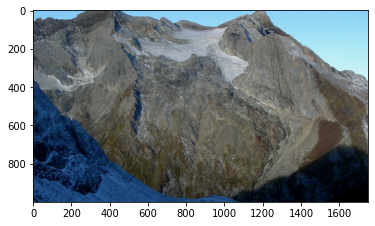

In [66]:
cropped = imgl[200:1200, 0:1750,:]
plt.imshow(cropped)

Text(0.5, 1.0, 'Segmented glacier area')

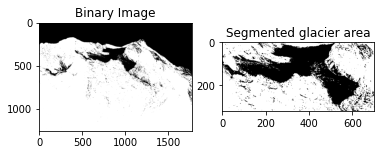

In [76]:
cropped_gray = cv.cvtColor(imgl,cv.COLOR_BGR2GRAY)
thresh = cv2.threshold(cropped_gray, 0, 250, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
snow = thresh[280:600, 500:1200]
fig,ax = plt.subplots(1,2)
ax[0].imshow(thresh, cmap = 'gray')
ax[0].set_title('Binary Image')
ax[1].imshow(snow, cmap = 'gray')
ax[1].set_title('Segmented glacier area')

In [88]:
'''
calculate the % of snow area using pixel intensities
'''
cropped_area = sum(sum(snow))
print(cropped_area)
all_black = np.zeros(snow.shape) #create all black first
all_black.fill(255)# fill to all white
cropped_area_all_white = sum(sum(all_black))
print(cropped_area_all_white)
diff = cropped_area_all_white - cropped_area
print(diff)
whole_picture = np.zeros(imgl_gray.shape) #create all black first
whole_picture.fill(255)
whole_white = sum(sum(whole_picture))
print(whole_white)
perc = cropped_area/whole_white
print(perc)
'''
calculate the % of snow area using pixel intensities
'''
cropped_area = sum(sum(snow))
print(cropped_area)
all_black = np.zeros(snow.shape) #create all black first
all_black.fill(255)# fill to all white
cropped_area_all_white = sum(sum(all_black))
print(cropped_area_all_white)
diff = cropped_area_all_white - cropped_area
print(diff)
whole_picture = np.zeros(imgl_gray.shape) #create all black first
whole_picture.fill(255)
whole_white = sum(sum(whole_picture))
print(whole_white)
perc = cropped_area/whole_white
print(perc)

print('the glacier area is of',"{:.5%}".format(perc), 'of the whole moutain area in Now')

199386
248625000.0
248425614.0
952663680.0
0.00020929316839285821
199386
248625000.0
248425614.0
952663680.0
0.00020929316839285821
the glacier area is of 0.02093% of the whole moutain area in Now


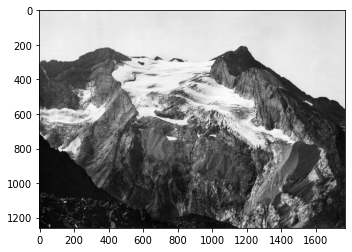

In [78]:
cropped = imgr[]
plt.imshow(cropped, cmap = 'gray')

Text(0.5, 1.0, 'Segmented glacier area')

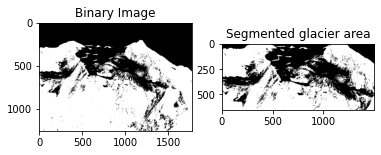

In [86]:
thresh = cv2.threshold(imgr, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
snow = thresh[250:900, 0:1500]
fig,ax = plt.subplots(1,2)
ax[0].imshow(thresh, cmap = 'gray')
ax[1].imshow(snow, cmap = 'gray')
ax[0].set_title('Binary Image')
ax[1].set_title('Segmented glacier area')

In [89]:

cropped_area = sum(sum(snow))
print(cropped_area)
all_black = np.zeros(snow.shape) #create all black first
all_black.fill(255)# fill to all white
cropped_area_all_white = sum(sum(all_black))
print(cropped_area_all_white)
diff = cropped_area_all_white - cropped_area
print(diff)
whole_picture = np.zeros(imgr.shape) #create all black first
whole_picture.fill(255)
whole_white = sum(sum(whole_picture))
print(whole_white)
perc_then = cropped_area/whole_white
print(perc_then)

print('the glacier area is of',"{:.5%}".format(perc_then), 'of the whole moutain area in Then')

199386
248625000.0
248425614.0
569343600.0
0.00035020328673230017
the glacier area is of 0.03502% of the whole moutain area in Then
